## Simple Linear Regression

y_i = b_i * x_i + a + e_i  
  
y_i = no. of minutes user i spends on the site daily,  
x_i = no. of friends user i has,  
e_i = error term 

In [1]:

num_friends = [100.0,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

In [2]:
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

We have the number of friends and the amount of time the user spends on the site each day.  
We assume that having more friends causes people to spend more time on the site.  
Since we found a pretty strong linear relationship, a natural place to start is a Linear Model.

In [3]:
def predict(alpha: float, beta: float, x_i: float) -> float:
    return beta * x_i + alpha

In [4]:
def error(alpha: float, beta: float, x_i: float, y_i: float) -> float:
    """
    The error from predicting beta * x_i + alpha
    when the actual value is y_i
    """
    return predict(alpha,beta,x_i) - y_i

In [5]:
from typing import List

In [6]:
Vector = List[float]

In [7]:
def sum_of_sqerrors(alpha: float, beta: float, x: Vector, y: Vector) -> float:
    return sum(error(alpha,beta,x_i,y_i)**2 
               for x_i, y_i in zip(x,y))

In [8]:
from typing import Tuple

In [9]:
Vector = List[float]

def dot(v: Vector, w: Vector) -> float:
    """Computes v_1 * w_1 + ... + v_n * w_n"""
    assert len(v) == len(w), "vectors must be same length"
    
    return sum(v_i * w_i for v_i, w_i in zip(v,w))

def sum_of_squares(v: Vector) -> float: 
    """Returns v_1 * v_1 + ... + v_n * v_n"""
    return dot(v,v)

def de_mean(xs: List[float]) -> List[float]:
    """Translates xs by subtracting its mean (so the result has mean 0)"""
    x_bar=mean(xs)
    return [x - x_bar for x in xs]

def variance(xs: List[float]) -> float:
    """Almost the average squared deviation from the mean"""
    assert len(xs) >= 2, "Variance requires at least two elements"
    
    n=len(xs)
    deviations = de_mean(xs)
    return sum_of_squares(deviations) / (n-1) 

In [10]:
def correlation(xs: List[float], ys: List[float]) -> float:
    """Measures how much xs and ys vary in tandem about their means"""
    stdev_x = standard_deviation(xs)
    stdev_y = standard_deviation(ys)
    if stdev_x > 0 and stdev_y > 0: 
        return covariance(xs, ys) / stdev_x /stdev_y
    else: 
        return 0 # if no variation, correlation is zero 
    
    
import math 

def standard_deviation(xs: List[float]) -> float: 
    """The standard deviation is the square root of the variance"""
    return math.sqrt(variance(xs))


def mean(xs: List[float]) -> float:
    return sum(xs) / len(xs)

In [11]:
def covariance(xs: List[float], ys: List[float]) -> float:
    assert len(xs) == len(ys), "xs and ys must have same number of elements"
    
    return dot(de_mean(xs),de_mean(ys)) / (len(xs) - 1)

The choice of alpha says that when we see the average value of the independent variable x, we predict the average value of the dependent variable y.

In [12]:
from IPython.display import Image
Image(filename=r'C:\Users\user\Desktop\alpha.png')


The choice of beta means that when the input value increases by standard deviation(x), the prediction then increases by correlation(x,y) * standard_deviation(y).

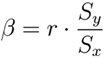

In [13]:
from IPython.display import Image
Image(filename=r'C:\Users\user\Desktop\beta.png')


In [14]:
def least_squares_fit(x: Vector, y: Vector) -> Tuple[float,float]:
    """
    Given two vectors x and y, 
    find the least-squares values of alpha and beta
    """
    beta = correlation(x,y) * standard_deviation(y) / standard_deviation(x)
    alpha = mean(y) - beta * mean(x)
    return alpha, beta

In [15]:
x = [i for i in range(-100,110,10)]
y = [3 * i - 5 for i in x ]

In [16]:
least_squares_fit(x,y)

(-5.0, 3.0)

In [17]:
least_squares_fit(num_friends,daily_minutes)

(27.008491305583856, 0.27501188078936734)

In [18]:
outlier = num_friends.index(100) # index of outlier

num_friends_good = [x 
                    for i, x in enumerate(num_friends)
                    if i != outlier]

daily_minutes_good = [x 
                      for i, x in enumerate(daily_minutes)
                      if i != outlier]

In [19]:
alpha, beta = least_squares_fit(num_friends_good,daily_minutes_good)

This gives alpha = 22.95 and beta = 0.903. So our model says that we expect a user with n friends to spend 22.95 + n * 0903 minutes on the site each day. That is, we predict that a user with no friends would still spend about 23 minutes a day on the site. And for each additional friend, we expect a user to spend almost a minute more on the site each day.

In [20]:
y_i = [beta*x_i+alpha for x_i in num_friends_good]

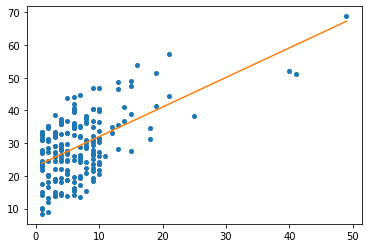

In [21]:
import matplotlib.pyplot as plt 
%matplotlib inline 

plt.plot(num_friends_good,daily_minutes_good,'o',markersize=4)
plt.plot(num_friends_good,y_i)

## Coefficient of Determination (or R-squared)
It measures the fraction of the total variation in the dependent variable that is captured by the model.

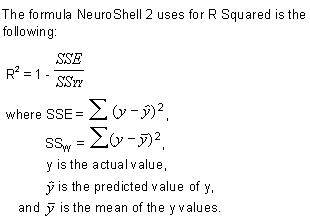

In [22]:
from IPython.display import Image
Image(filename=r'C:\Users\user\Desktop\r2.png')

In [23]:
def total_sum_of_squares(v: Vector) -> float:
    """the total squared variation of y_i's from their mean"""
    return sum(v**2 for v in de_mean(v))

def r_squared(alpha: float, beta: float, x: Vector, y: Vector) -> float: 
    """
    the fraction of variation in y captured by the model, 
    which equals to 1 - the fraction of variation in y not captured by the model
    """
    return 1.0 - (sum_of_sqerrors(alpha, beta, x, y) / total_sum_of_squares(y))

In [24]:
rsq = r_squared(alpha, beta, num_friends_good, daily_minutes_good)

In [25]:
print("R-squared: ",rsq)

R-squared:  0.3291078377836305
